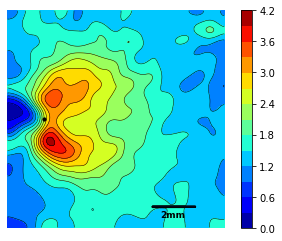

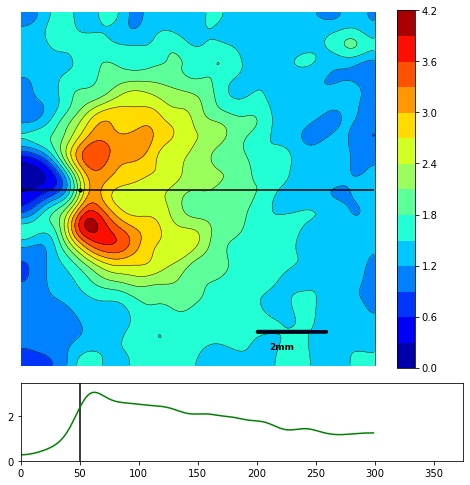

In [150]:
import numpy as  np
import matplotlib.pyplot as plt
import pandas as pd
import cv2
import os
import sys
import glob
import DIC.DIC as dic
from matplotlib.gridspec import GridSpec


path = r'E:\experiment data\aluminum\2021-03-30\AL IMAGE\CTS_UVon_HSC'
save_path =r'E:\experiment data\aluminum\2021-03-30\AL IMAGE\CTS_UVon_HSC/Output'
image = dic.load_file(path)


i = 0 ##ref
j = 4##cur
crack_tip = [[400,207],[397,210],[389,205],[387,202],[386,200]] # y, x
left, right, up_down = 50,250,150


cur = list(image.keys())[j]

src_reference = image['ff0870'][:,:,1][crack_tip[i][0]-up_down:crack_tip[i][0]+up_down,crack_tip[i][1]-left:crack_tip[i][1]+right]
src_current = image[cur][:,:,1][crack_tip[j][0]-up_down:crack_tip[j][0]+up_down,crack_tip[j][1]-left:crack_tip[j][1]+right]

dst = cv2.subtract(src_current,src_reference)
dst = dst.astype(float)
dst = np.where(dst>10, dst*0, dst)
gas = cv2.GaussianBlur(dst,(0,0),10)
gas[270:272,200:260] = 0


plt.imshow(src_current, cmap='gray')
plt.axis('off')
csf= plt.contourf(gas, 15, cmap = 'jet')
plt.contour(gas, 15, colors='black', linewidths = 0.5)
plt.scatter(50,150, color= 'black', s=10)
plt.colorbar(csf)
plt.text( 210,285, '2mm', fontsize=9, fontweight='bold')

# plt.savefig(save_path+'/'+cur+'line.png', dpi=200)




fig = plt.figure(figsize=(10, 10))
gs = GridSpec(nrows=6, ncols=5)
# First axes
ax0 = fig.add_subplot(gs[0:4, 0:4])
ax0.imshow(gas,cmap='gray')
csf= ax0.contourf(gas, 15, cmap = 'jet')

ax0.contour(gas, 15, colors='black', linewidths = 0.5)
plt.colorbar(csf)
plt.text( 210,285, '2mm', fontsize=9, fontweight='bold')
ax0.hlines(150,0,np.shape(gas)[1]-1, color='black')
ax0.scatter(50,150, color= 'black', s=10)
# ax0.vlines(50,0,np.shape(gas)[0]-1, color='black')
ax0.axis('off')
#
# # u axes
ax2 = fig.add_subplot(gs[4, 0:4])
ax2.plot(gas[150,:], color='green')
ax2.vlines(50,0,3.5,colors='black')
ax2.set_ylim(0,3.5)
ax2.set_xlim(0,375)
#
plt.savefig(save_path+'/'+cur+'line.png', dpi=200)

# np.savetxt(save_path+'/'+cur+'.csv', gas)

In [116]:
import fracture

num = 4
force = [3786.621, 7848.816, 9017.028, 10323.486]
cts  = fracture.CTS(1.875,3.0,force[num-1]/1000,0.3)
print(cts.k1(), cts.k2())

fracture.Plastic_zone(cts.k1(), 503).von_mises()[2]*1000


74.7367519086588 47.15783016577714


3.513602279008208